# 파이토치 MNIST 모델

## modules import 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## 전처리 설정
- `transform.Compose`

In [2]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, ), (0.5, ))])

## 데이터 로드 및 데이터 확인

In [3]:
trainset = torchvision.datasets.MNIST(root = './data',
                                      train=True, 
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root = './data',
                                      train=False, 
                                      download=True,
                                      transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_loader =DataLoader(trainset, batch_size = 128,
                         shuffle=True, num_workers=2 )

train_loader =DataLoader(testset, batch_size = 128,
                         shuffle=False, num_workers=2)

In [5]:
image, label = next(iter(train_loader))

In [6]:
image.shape , label.shape
#batch_size = 128, 채널 수 = 1, 28*28 size

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [8]:
def imshow(img):
  img = img/2 + 0.5
  npimg =  img.numpy()
  fig = plt.figure(figsize=(10,5))
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

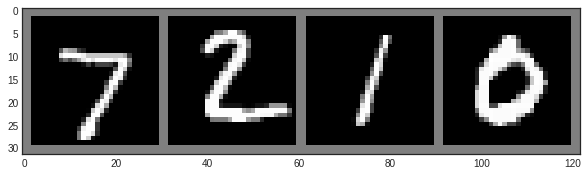

In [9]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:4]))

## 신경망 구성

In [25]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self , x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1

    for s in size:
      num_features *= s

    return num_features

net = Net()
print(net) 

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


- `.parameters()` 

In [26]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


임의의 값을 넣어 forward값 확인

In [27]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[-0.0261, -0.0649,  0.1344,  0.0544, -0.0053, -0.1137, -0.0258,  0.0994,
         -0.1605,  0.0906]], grad_fn=<AddmmBackward0>)


## 손실함수와 옵티마이저

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

## 모델 학습

- `optimizer.zero_grad` : 가중치의 그래디언트 초기화

- loss 계산

- `loss.backward()`

- `optmizer.step()` : 업데이트

- 배치수 확인

In [29]:
total_batch = len(train_loader)
print(total_batch)

79


- 설명을 위해 `epochs=2`로 지정

## 모델의 저장 및 로드

- `torch.save`
  - `net.state_dict()`를 저장

- `torch.load`
  - `load_state_dict`로 모델을 로드

## 모델 테스트

## GPU 설정 후 학습
- 설정 후, 모델과 데이터에 `to`로 GPU를 사용 가능한 형태로 변환 해줘야 한다.

- `.cuda()` 로도 가능

- 현재 GPU 설정

- 데이터 로드


- 모델 생성